In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rikitea pf
lebu cl
khatanga ru
puerto ayora ec
yellowknife ca
upington za
mataura pf
thompson ca
saint-philippe re
castro cl
sao joao da barra br
hermiston us
beringovskiy ru
hermanus za
mufumbwe zm
geraldton au
marfino ru
qaanaaq gl
tiksi ru
ushuaia ar
port macquarie au
hermanus za
castro cl
hilo us
belushya guba ru
mataura pf
belushya guba ru
kodiak us
taolanaro mg
punta arenas cl
xinzhi cn
hobart au
bluff nz
vaini to
rikitea pf
leningradskiy ru
lethem gy
luanda ao
lompoc us
airai pw
dikson ru
burnie au
new norfolk au
mataura pf
bengkulu id
kapaa us
rikitea pf
bathsheba bb
bucerias mx
rikitea pf
georgetown sh
rikitea pf
kapaa us
williams lake ca
bluff nz
mataura pf
luderitz na
hambantota lk
illoqqortoormiut gl
tumannyy ru
ushuaia ar
dikson ru
fortuna us
san patricio mx
olafsvik is
kula bg
maloy no
chokurdakh ru
georgetown sh
vaini to
bluff nz
bluff nz
punta arenas cl
bredasdorp za
palabuhanratu id
edremit tr
torbay ca
albany au
hobart au
jamestown sh
punta arenas cl
tual id
lata sb
b

airai pw
nara ml
gamba ga
turukhansk ru
hermanus za
san quintin mx
port blair in
fort nelson ca
hachinohe jp
mogadishu so
skalistyy ru
ushuaia ar
cape town za
punta arenas cl
lazaro cardenas mx
pangnirtung ca
elliot lake ca
kruisfontein za
popondetta pg
hokitika nz
rikitea pf
toktogul kg
punta arenas cl
hamilton bm
mahibadhoo mv
provideniya ru
carnarvon au
ponta do sol cv
mataura pf
kapaa us
kavieng pg
benghazi ly
ushuaia ar
rikitea pf
rio gallegos ar
cape town za
albany au
fort-de-france mq
east london za
luganville vu
coahuayana mx
vaini to
namibe ao
ushuaia ar
novikovo ru
puerto ayora ec
kamenka ru
lamar us
bluff nz
padang id
opuwo na
tumannyy ru
punta arenas cl
samusu ws
taolanaro mg
lompoc us
kruisfontein za
albany au
taolanaro mg
alta floresta br
boa vista br
constitucion mx
tamna ro
khatanga ru
ushuaia ar
amderma ru
kruisfontein za
bredasdorp za
port hawkesbury ca
guerrero negro mx
severnoye ru
mazagao br
adelaide au
yeppoon au
kapaa us
matay eg
lokosovo ru
amderma ru
saint-phil

katsuura jp
saint-philippe re
imbituba br
albany au
westport ie
hermanus za
nikolskoye ru
bluff nz
punta arenas cl
ust-tarka ru
pevek ru
baykit ru
inhambane mz
hithadhoo mv
nizhneyansk ru
zhanaozen kz
cidreira br
punta arenas cl
leh in
aksarka ru
mangai cd
mar del plata ar
georgetown sh
aswan eg
jamestown sh
hobart au
rikitea pf
georgetown sh
qaanaaq gl
mataura pf
morros br
iqaluit ca
talnakh ru
tadine nc
qaanaaq gl
chuy uy
pevek ru
cumberland ca
lebu cl
bandarbeyla so
yellowknife ca
taolanaro mg
new norfolk au
lagoa pt
kapaa us
aklavik ca
shar kz
mindelo cv
nabire id
yellowknife ca
itarema br
kavieng pg
rikitea pf
rikitea pf
karauzyak uz
myitkyina mm
chuy uy
rikitea pf
french harbor hn
san quintin mx
lompoc us
ushuaia ar
sevnica si
cidreira br


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [8]:
import requests
requests.__version__

'2.24.0'

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | upington
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | hermiston
Processing Record 13 of Set 1 | beringovskiy
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | mufumbwe
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | marfino
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | port macquarie
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 |

Processing Record 38 of Set 4 | palmer
Processing Record 39 of Set 4 | ambon
Processing Record 40 of Set 4 | ampanihy
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | belawan
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | manzhouli
Processing Record 46 of Set 4 | bonavista
Processing Record 47 of Set 4 | atuona
Processing Record 48 of Set 4 | cordoba
Processing Record 49 of Set 4 | coracao de maria
Processing Record 50 of Set 4 | eyemouth
Processing Record 1 of Set 5 | bandarbeyla
Processing Record 2 of Set 5 | bay roberts
Processing Record 3 of Set 5 | naze
Processing Record 4 of Set 5 | thanh hoa
Processing Record 5 of Set 5 | pestovo
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | kupang
Processing Record 9 of Set 5 | sakhipur
Processing Record 10 of Set 5 | kavieng
Processing Record 11 of Set 5 | okhotsk
Processing Record 12 of Set 5 | l

Processing Record 30 of Set 8 | yeppoon
Processing Record 31 of Set 8 | lokosovo
Processing Record 32 of Set 8 | leshan
Processing Record 33 of Set 8 | samoded
Processing Record 34 of Set 8 | vao
Processing Record 35 of Set 8 | ostrovnoy
Processing Record 36 of Set 8 | dingle
Processing Record 37 of Set 8 | kichera
Processing Record 38 of Set 8 | antonina
Processing Record 39 of Set 8 | rungata
City not found. Skipping...
Processing Record 40 of Set 8 | solaro
Processing Record 41 of Set 8 | marzuq
Processing Record 42 of Set 8 | sur
Processing Record 43 of Set 8 | faya
Processing Record 44 of Set 8 | komsomolskiy
Processing Record 45 of Set 8 | thunder bay
Processing Record 46 of Set 8 | chuy
Processing Record 47 of Set 8 | victor harbor
Processing Record 48 of Set 8 | alenquer
Processing Record 49 of Set 8 | zhirnovsk
Processing Record 50 of Set 8 | kavaratti
Processing Record 1 of Set 9 | ambunti
Processing Record 2 of Set 9 | baykit
Processing Record 3 of Set 9 | opunake
Processing

Processing Record 14 of Set 12 | morris
Processing Record 15 of Set 12 | sokoni
Processing Record 16 of Set 12 | baruun-urt
Processing Record 17 of Set 12 | jiayuguan
Processing Record 18 of Set 12 | borama
City not found. Skipping...
Processing Record 19 of Set 12 | mezhdurechensk
Processing Record 20 of Set 12 | kuching
Processing Record 21 of Set 12 | cherskiy
Processing Record 22 of Set 12 | kushmurun
Processing Record 23 of Set 12 | sungai padi
Processing Record 24 of Set 12 | hauterive
Processing Record 25 of Set 12 | adre
Processing Record 26 of Set 12 | samarinda
Processing Record 27 of Set 12 | bulgan
Processing Record 28 of Set 12 | saravan
Processing Record 29 of Set 12 | rosario
Processing Record 30 of Set 12 | bubaque
Processing Record 31 of Set 12 | dhidhdhoo
Processing Record 32 of Set 12 | chapais
Processing Record 33 of Set 12 | never
Processing Record 34 of Set 12 | safaga
Processing Record 35 of Set 12 | nossa senhora da gloria
Processing Record 36 of Set 12 | zuhres

In [12]:
len(city_data)

562

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.26,69,99,11.05,PF,2021-02-04 17:54:00
1,Lebu,-37.6167,-73.6500,71.28,51,1,5.53,CL,2021-02-04 17:54:00
2,Khatanga,71.9667,102.5000,-30.86,79,0,8.84,RU,2021-02-04 17:54:00
3,Puerto Ayora,-0.7393,-90.3518,86.00,70,0,19.57,EC,2021-02-04 17:54:00
4,Yellowknife,62.4560,-114.3525,-24.00,68,20,10.36,CA,2021-02-04 17:50:02
5,Upington,-28.4478,21.2561,95.00,13,20,5.75,ZA,2021-02-04 17:54:00
6,Mataura,-46.1927,168.8643,40.98,93,29,3.71,NZ,2021-02-04 17:54:01
7,Thompson,55.7435,-97.8558,-9.40,77,90,11.50,CA,2021-02-04 17:54:01
8,Saint-Philippe,-21.3585,55.7679,82.40,65,75,6.91,RE,2021-02-04 17:54:01
9,Castro,-24.7911,-50.0119,78.04,80,41,9.89,BR,2021-02-04 17:54:01


In [14]:
new_column_order = ["City", "Country", "Date", "Lat" , "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-02-04 17:54:00,-23.1203,-134.9692,78.26,69,99,11.05
1,Lebu,CL,2021-02-04 17:54:00,-37.6167,-73.6500,71.28,51,1,5.53
2,Khatanga,RU,2021-02-04 17:54:00,71.9667,102.5000,-30.86,79,0,8.84
3,Puerto Ayora,EC,2021-02-04 17:54:00,-0.7393,-90.3518,86.00,70,0,19.57
4,Yellowknife,CA,2021-02-04 17:50:02,62.4560,-114.3525,-24.00,68,20,10.36
5,Upington,ZA,2021-02-04 17:54:00,-28.4478,21.2561,95.00,13,20,5.75
6,Mataura,NZ,2021-02-04 17:54:01,-46.1927,168.8643,40.98,93,29,3.71
7,Thompson,CA,2021-02-04 17:54:01,55.7435,-97.8558,-9.40,77,90,11.50
8,Saint-Philippe,RE,2021-02-04 17:54:01,-21.3585,55.7679,82.40,65,75,6.91
9,Castro,BR,2021-02-04 17:54:01,-24.7911,-50.0119,78.04,80,41,9.89


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/04/21'

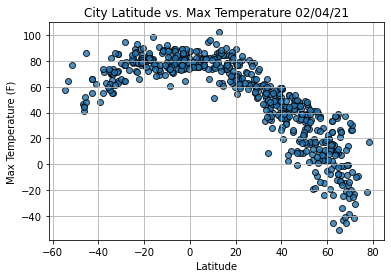

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

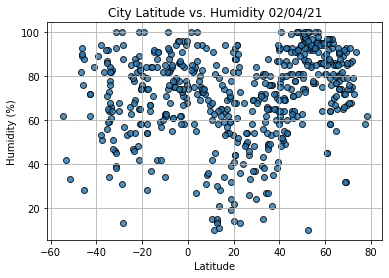

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

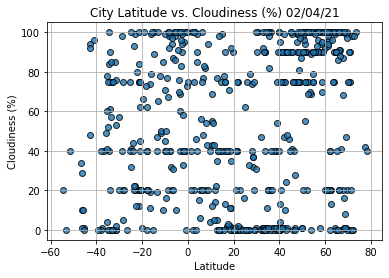

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

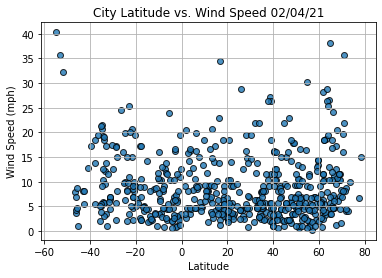

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2021-02-04 17:54:02
Lat                      -34.4187
Lng                       19.2345
Max Temp                    71.01
Humidity                       73
Cloudiness                     40
Wind Speed                   5.99
Name: 13, dtype: object

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Khatanga,RU,2021-02-04 17:54:00,71.9667,102.5000,-30.86,79,0,8.84
4,Yellowknife,CA,2021-02-04 17:50:02,62.4560,-114.3525,-24.00,68,20,10.36
7,Thompson,CA,2021-02-04 17:54:01,55.7435,-97.8558,-9.40,77,90,11.50
11,Hermiston,US,2021-02-04 17:54:02,45.8404,-119.2895,44.01,61,75,14.97
12,Beringovskiy,RU,2021-02-04 17:54:02,63.0500,179.3167,-0.78,93,100,18.72


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-02-04 17:54:00,-23.1203,-134.9692,78.26,69,99,11.05
1,Lebu,CL,2021-02-04 17:54:00,-37.6167,-73.6500,71.28,51,1,5.53
3,Puerto Ayora,EC,2021-02-04 17:54:00,-0.7393,-90.3518,86.00,70,0,19.57
5,Upington,ZA,2021-02-04 17:54:00,-28.4478,21.2561,95.00,13,20,5.75
6,Mataura,NZ,2021-02-04 17:54:01,-46.1927,168.8643,40.98,93,29,3.71


In [31]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

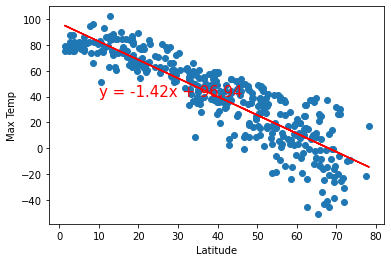

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [33]:
# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

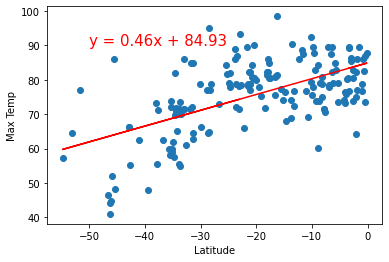

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [35]:
# Find the Correlation Between Latitude and Percent Humidity

In [36]:
# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

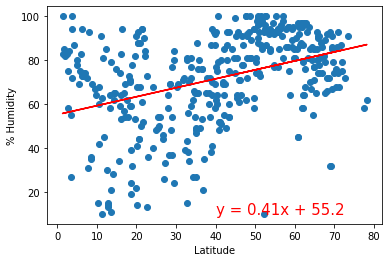

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [40]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

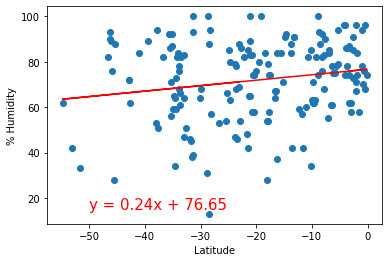

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [44]:
# Find the Correlation Between Latitude and Percent Cloudiness
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

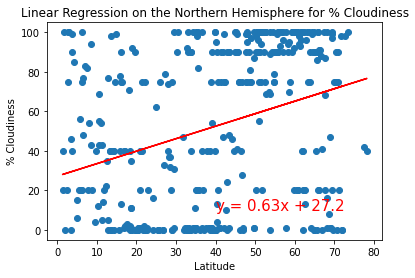

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Northern Hemisphere for % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [52]:
# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

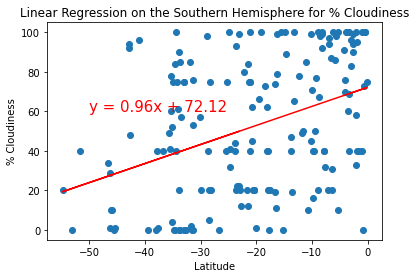

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Southern Hemisphere for % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [54]:
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere

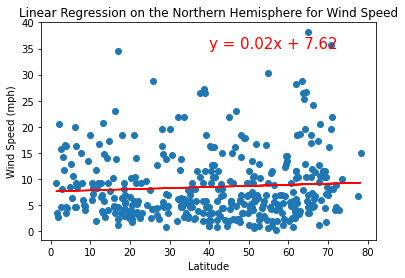

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,35))

In [64]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

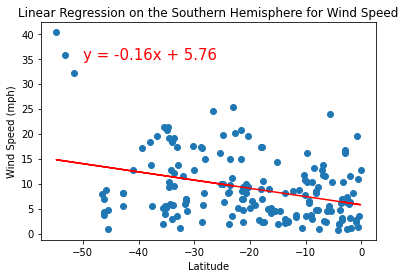

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,35))